In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fminbound,fmin
from scipy.special import loggamma

In [2]:
s = np.random.normal(0,1,200)
sout = [8,8.75,9.5]
sall = np.concatenate([s,sout])
print(sall.shape)

(203,)


In [3]:
def StudentDist(x,mu,sigma,v):
    coef = math.gamma((v+1)/2)/np.sqrt(math.pi*v)/math.gamma(v/2)
    y = coef*(1+((x-mu)/sigma)**2/v)**(-(v+1)/2)
    return y 

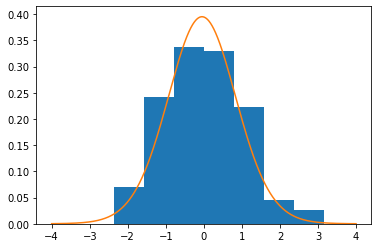

In [4]:
x = np.linspace(-4,4,10000)
count, bins, ignored = plt.hist(s, 7, density=True)
y = StudentDist(x,-0.0484,0.9017,26.6166)
plt.plot(x,y)

In [5]:
mu = np.random.normal(0,1,1)
sigma = np.random.uniform(0,1,1)
v = 1

In [6]:
print(mu)
print(sigma)

[1.05123435]
[0.17551653]


In [7]:
def studentLogprob(x,mu,sigma,v):
    d = 1
    x = x-mu
    mahal = x*x/sigma
    #print(x*x)
    logc=loggamma(v/2+d/2)-loggamma(v/2)-.5*np.log(sigma)-d*np.log(v)/2-d*np.log(math.pi)/2
    #print(logc)
    logp=logc-(v+d)/2*np.log1p(mahal/v)
    #print(-(v+d)/2)
    #print(mahal/v)
    return logp
   

In [8]:
ss = s-mu
a = np.log1p(ss*ss/sigma)
logc = loggamma((v+1)/2)-loggamma(v/2)-.5*np.log(sigma)-np.log(v)/2-np.log(math.pi)/2
sum(logc-(v+1)/2*a)

-452.7033746119701

In [9]:
sum(studentLogprob(s,mu,sigma,v))

-452.7033746119701

In [10]:
sum(studentLogprob(s,mu,sigma,v))

-452.7033746119701

In [11]:
def estep(x,mu,sigma,v):
    loglik = sum(studentLogprob(x,mu,sigma,v))
    N = len(x)
    D = 1
    xc = x-mu
    delta = xc*xc/sigma
    w = (v+D)/(v+delta)
    xw = x*w
    Sw = sum(w)
    Sx = sum(xw)
    Sxx = sum(xw*x)

    return Sw,Sx,Sxx,N,loglik

def mstep(Sw,Sx,Sxx,N,x):
    mu = Sx/Sw
    sigma = (Sxx-Sx*Sx/Sw)/N
    fn = lambda v: -sum(studentLogprob(x,mu,sigma,v))
    v = fminbound(fn,0.1,1000)
    return mu,sigma,v

In [12]:
def convergenceTest(fval,fval0,thres):
    converged = False
    delta_fval = np.abs(fval-fval0)
    avg_fval = (np.abs(fval)+np.abs(fval0))/2
    if delta_fval/avg_fval < thres:
        converged = True
    return converged

In [13]:
maxIter = 50; convTol = 1e-4; Iter = 1;
done = False; loglikHist = []
while not done:
    Sw,Sx,Sxx,N,loglik = estep(s,mu,sigma,v)
    loglikHist.append(loglik)
    mu,sigma,v = mstep(Sw,Sx,Sxx,N,s)
    if Iter > maxIter:
        done = True
    elif Iter > 1:
        if convergenceTest(loglikHist[Iter-1],loglikHist[Iter-2],convTol):
            done = True
    Iter += 1

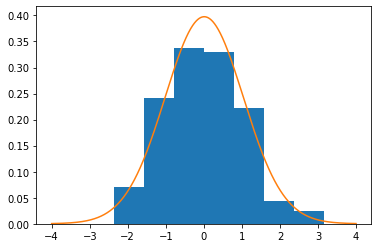

In [14]:
count, bins, ignored = plt.hist(s, 7, density=True)
y = StudentDist(x,mu,sigma,v)
plt.plot(x,y)